In [1]:
%autosave 600
%matplotlib inline
#%load_ext autoreload
#%autoreload 2
#%pdb

Autosaving every 600 seconds


In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ""

import torch
torch.set_num_threads(4)

In [3]:
cd ..

/master


In [4]:
import os
import numpy as np
import pdb

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

from utils.data import get_train_dev_test_ssl

from skssl.training import NeuralNetEstimator, NeuralNetClassifier
from skssl.classifiers.sslvae import SSLVAELoss, SSLVAE, add_flat_input
from skssl.predefined import (WideResNet, ReversedWideResNet, ReversedSimpleCNN,
                              SimpleCNN)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
train, dev, test = get_train_dev_test_ssl("mnist")

In [6]:
from pretrained import *

In [ ]:
m=load_pretrained("sslvae","mnist",is_retrain=True, mode="auxiliary")

/master/skssl/predefined/mlp.py:52: UserWarning: hidden_size=32 smaller than output=128 and input=64. Setting it to 64.
  warnings.warn(txt.format(hidden_size, output_size, input_size, self.hidden_size))
/master/skssl/predefined/mlp.py:52: UserWarning: hidden_size=32 smaller than output=128 and input=138. Setting it to 128.
  warnings.warn(txt.format(hidden_size, output_size, input_size, self.hidden_size))


> /master/skssl/classifiers/auxsslvae.py(57)_labelled_loss()
-> assert q_a_sample is not None and q_a_suff_stat is not None
(Pdb) n
> /master/skssl/classifiers/auxsslvae.py(58)_labelled_loss()
-> (*vae_inputs), p_a_sample, p_a_suff_stat = inputs
(Pdb) n
> /master/skssl/classifiers/auxsslvae.py(60)_labelled_loss()
-> ssl_vae_loss = super()._labelled_loss(vae_inputs, X, weight=weight)
(Pdb) n
> /master/skssl/classifiers/auxsslvae.py(62)_labelled_loss()
-> auxiliary_kl = kl_normal_loss(q_a_suff_stat, p_a_suff_stat)
(Pdb) n
> /master/skssl/classifiers/auxsslvae.py(63)_labelled_loss()
-> if weight is not None:
(Pdb) n
> /master/skssl/classifiers/auxsslvae.py(65)_labelled_loss()
-> auxiliary_kl = auxiliary_kl.mean(dim=0)
(Pdb) n
> /master/skssl/classifiers/auxsslvae.py(67)_labelled_loss()
-> return ssl_vae_loss + auxiliary_kl
(Pdb) auxiliary_kl
tensor(798.9174, device='cuda:0', grad_fn=<MeanBackward2>)
(Pdb) n
--Return--
> /master/skssl/classifiers/auxsslvae.py(67)_labelled_loss()->tensor(14

In [ ]:
d=m.transform(dev)

In [9]:
d.shape

(6000, 64)

In [ ]:
m=load_pretrained("supervised","mnist",is_vae=True, is_retrain=True, z_dim=64 )

> /master/pretrained.py(128)_pretrained_supervised()
-> net.fit(train, train.targets)
(Pdb) l
123  	    if is_retrain:
124  	        if is_vae:
125  	            net = add_vae(net, dataset)
126  	            import pdb
127  	            pdb.set_trace()
128  ->	        net.fit(train, train.targets)
129  	    else:
130  	        net.initialize()
131  	        net.load_params(checkpoint=chckpt)
132  	        if is_vae:
133  	            net = add_vae(net, dataset)
(Pdb) net
Pipeline(memory=None,
         steps=[('m1',
                 <class 'skssl.training.trainer.NeuralNetTransformer'>[initialized](
  module_=VAE(
    (encoder): WideResNet(
      (conv): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (block1): Sequential(
        (0): _ResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_sta...
      (lin2): Linear(in_features=256, out_features=256, bias=True)
   

(Pdb) net["classifier"].module
MLP(
  (activation): ReLU()
  (to_hidden): Linear(in_features=64, out_features=64, bias=True)
  (linears): ModuleList()
  (out): Linear(in_features=64, out_features=10, bias=True)
)
(Pdb) net["classifier"].module["linears"]
*** TypeError: 'MLP' object is not subscriptable
(Pdb) net["classifier"].module.linears
ModuleList()
(Pdb) net["classifier"].module.linears.__dict__
{'_backend': <torch.nn.backends.thnn.THNNFunctionBackend object at 0x7fda2456c1d0>, '_parameters': OrderedDict(), '_buffers': OrderedDict(), '_backward_hooks': OrderedDict(), '_forward_hooks': OrderedDict(), '_forward_pre_hooks': OrderedDict(), '_state_dict_hooks': OrderedDict(), '_load_state_dict_pre_hooks': OrderedDict(), '_modules': OrderedDict(), 'training': True}
(Pdb) l
134  	
135  	    return net
136  	
137  	
138  	def _pretrained_vae(dataset,
139  	                    z_dim=64,
140  	                    enc_dec="resnetEnc_cnnDec",
141  	                    is_retrain=False,
142  	

(Pdb) net["m1"].transform(dev)
array([[-0.00276241,  0.00067723,  0.00540708, ..., -0.0024971 ,
        -0.00438965, -0.00476602],
       [-0.01494281, -0.00823216,  0.00679572, ...,  0.00706   ,
         0.00502021,  0.00374097],
       [ 0.00060525, -0.01147806,  0.00566249, ..., -0.00128483,
        -0.0015083 , -0.00373902],
       ...,
       [ 0.00324314,  0.00023329,  0.00573749, ...,  0.00687922,
        -0.02509495, -0.00113618],
       [ 0.00245508, -0.00216226, -0.00229038, ..., -0.01109677,
         0.01154441,  0.00664049],
       [ 0.00758858,  0.00322984,  0.00118692, ...,  0.00718577,
        -0.00232957, -0.00019878]], dtype=float32)
(Pdb) d=net["m1"].transform(dev)
*** Newest frame
(Pdb) !d=net["m1"].transform(dev)
(Pdb) d.shape
*** Newest frame
(Pdb) !d=(net["m1"]).transform(dev)
(Pdb) d
*** Newest frame
(Pdb) d.shape
*** Newest frame
(Pdb) net["m1"].transform(dev)
array([[-0.00276241,  0.00067723,  0.00540708, ..., -0.0024971 ,
        -0.00438965, -0.00476602],
   

/master/skssl/training/trainer.py:106: UserWarning: Skipping fitting because froze etimator.
  warnings.warn("Skipping fitting because froze etimator.")


*** RuntimeError: size mismatch, m1: [8192 x 32], m2: [64 x 64] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:268
(Pdb) net.forward(dd)
*** AttributeError: 'Pipeline' object has no attribute 'forward'
(Pdb) net["classifier"].forward(dd)
tensor([[-1.9340e-03,  3.2902e-03, -2.9093e-03,  ..., -2.5075e-04,
         -1.4222e-03,  5.9264e-03],
        [-1.7266e-03,  3.2016e-03, -2.5906e-03,  ...,  9.2638e-04,
          2.7919e-03,  5.3499e-03],
        [ 7.5606e-04,  1.7746e-03, -8.7107e-04,  ...,  2.2456e-03,
          2.8302e-04, -1.6111e-03],
        ...,
        [-3.5976e-04, -4.9476e-03, -1.5960e-03,  ...,  9.0959e-05,
          1.4034e-03,  4.3184e-03],
        [ 3.7097e-03,  5.1098e-03,  7.0083e-03,  ...,  9.4897e-03,
         -4.5518e-03, -4.6118e-03],
        [ 1.2834e-04,  3.8599e-03, -2.6313e-03,  ...,  4.1404e-04,
          2.8063e-03,  4.2703e-03]])
(Pdb) train.targets
array([-1, -1, -1, ..., -1, -1, -1])
(Pdb) train.targets.shape
(54000,)
(Pdb) train.shape
(1, 32, 32)
-

In [5]:
train, dev, test = get_train_dev_test_ssl("mnist")

# Low Alpha

In [6]:
m2 = SSLVAE(train.shape, train.n_classes,
            Encoder=add_flat_input(WideResNet), 
            Decoder=ReversedSimpleCNN,
            Classifier=SimpleCNN,
            z_dim=64)

model_low=NeuralNetClassifier(m2, 
                   criterion=SSLVAELoss, 
                   criterion__distribution="bernoulli",
                   criterion__alpha=0.01,
                  max_epochs=30,
                           devset=dev)

In [7]:
model_low.fit(train)

  epoch    train_loss    valid_acc    valid_loss       dur
-------  ------------  -----------  ------------  --------
      1      428.9179       0.8138      182.9620  232.7027


      2      314.1411       0.7867      166.3779  261.8193


      3      292.4451       0.8348      163.6429  217.0386


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      6      273.8294       0.8775      153.3644  216.3448


      7      271.0684       0.8757      151.0256  216.8105


      8      268.3111       0.9005      150.8627  216.2365


      9      266.9062       0.8868      148.6382  213.7828


     10      265.1744       0.8893      149.6992  214.4025


     11      263.8010       0.9073      149.3761  215.1047


     12      262.7289       0.8915      148.5261  215.1342


     13      261.8711       0.8790      147.0559  214.7568


     14      260.7889       0.9040      146.9963  214.7258


     15      260.0045       0.9153      146.6933  214.3795


     16      259.0294       0.9038      146.2044  215.4895


     17      258.6962       0.9078      145.6989  215.4675


     19      257.3758       0.9007      144.9679  214.9152


     20      256.9355       0.9165      144.0440  214.7158


     21      256.5103       0.9112      146.3688  214.2556


     22      256.0842       0.9072      144.0227  215.7900


     23      255.5580       0.9247      143.2895  216.7712


     24      255.3127       0.9273      142.7975  216.8182


     25      254.7077       0.8977      143.9461  216.8193


     26      254.4664       0.9160      144.4475  216.9497


     27      253.9928       0.9215      143.2336  216.7392


     28      253.6747       0.9093      143.9479  216.9500


     29      253.5272       0.9178      142.1999  216.0418


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
model_low.score(test, test.targets)

0.915

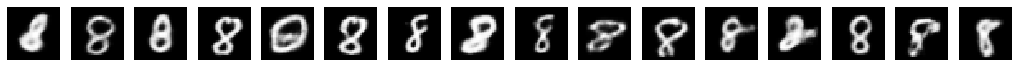

In [10]:
sslvae = model_low.module_
sslvae.eval()
with torch.no_grad():
    z = torch.randn(16, 64).cuda()
    y = torch.tensor([8]).repeat(16, 1).cuda() # Generate a batch of 7s
    pred = sslvae.sample_decode(z, y)

import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 16, figsize=(18, 12))

try:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().permute(1,2,0))
        ax.axis("off")
except:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().squeeze(), cmap='gray')
        ax.axis("off")

# High Alpha

In [ ]:
m2 = SSLVAE(train.shape, train.n_classes,
            Encoder=add_flat_input(WideResNet), 
            Decoder=ReversedSimpleCNN,
            Classifier=SimpleCNN,
            z_dim=64)

model_high=NeuralNetClassifier(m2, 
                   criterion=SSLVAELoss, 
                   criterion__distribution="bernoulli",
                   criterion__alpha=30,
                  max_epochs=30,
                           devset=dev)

In [ ]:
model_high.fit(train)

In [ ]:
model_high.score(test, test.targets)

In [ ]:
sslvae = model_high.module_
sslvae.eval()
with torch.no_grad():
    z = torch.randn(16, 64).cuda()
    y = torch.tensor([8]).repeat(16, 1).cuda() # Generate a batch of 7s
    pred = sslvae.sample_decode(z, y)

import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 16, figsize=(18, 12))

try:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().permute(1,2,0))
        ax.axis("off")
except:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().squeeze(), cmap='gray')
        ax.axis("off")

# Medium Alpha

In [9]:
m2 = SSLVAE(train.shape, train.n_classes,
            Encoder=make_ssl_encoder(WideResNet), 
            Decoder=ReversedSimpleCNN,
            Classifier=SimpleCNN,
            z_dim=64)

model_med=NeuralNetClassifier(m2, 
                   criterion=SSLVAELoss, 
                   criterion__distribution="bernoulli",
                   criterion__alpha=5,
                  max_epochs=30,
                           devset=dev)

NameError: name 'make_ssl_encoder' is not defined

In [ ]:
model_med.fit(train)

In [ ]:
model_med.score(test, test.targets)

In [ ]:
sslvae = model_med.module_
sslvae.eval()
with torch.no_grad():
    z = torch.randn(16, 64).cuda()
    y = torch.tensor([8]).repeat(16, 1).cuda() # Generate a batch of 7s
    pred = sslvae.sample_decode(z, y)

import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 16, figsize=(18, 12))

try:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().permute(1,2,0))
        ax.axis("off")
except:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().squeeze(), cmap='gray')
        ax.axis("off")

# Low Alpha Laplace

In [6]:
m2 = SSLVAE(train.shape, train.n_classes,
            Encoder=add_flat_input(WideResNet), 
            Decoder=ReversedSimpleCNN,
            Classifier=WideResNet,
            z_dim=64)

model_low_laplace=NeuralNetClassifier(m2, 
                   criterion=SSLVAELoss, 
                   criterion__distribution="laplace",
                   criterion__alpha=10,
                  max_epochs=30,
                           devset=dev)

In [7]:
train, dev, test = get_train_dev_test_ssl("mnist")

In [8]:
model_low_laplace.fit(train)

<class 'skssl.training.trainer.NeuralNetClassifier'>[initialized](
  module_=SSLVAE(
    (classifier): WideResNet(
      (conv): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (block1): Sequential(
        (0): _ResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (conv_shortcut): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
        (1): _ResLayer(
          (act): LeakyReLU(negative_slope=0.1)
          (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv1): Conv2d(32, 32, kernel

In [30]:
model_low_laplace.score(test, test.targets)

0.1957

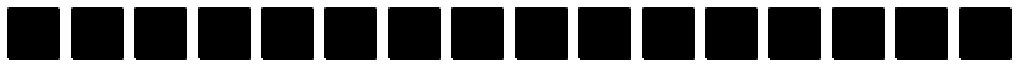

In [22]:
sslvae = model_low_laplace.module_
sslvae.eval()
with torch.no_grad():
    z = torch.randn(16, 64).cuda()
    y = torch.tensor([8]).repeat(16, 1).cuda() # Generate a batch of 7s
    pred = sslvae.sample_decode(z, y)

import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 16, figsize=(18, 12))

try:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().permute(1,2,0))
        ax.axis("off")
except:
    for i, ax in enumerate(axarr.flat):
        ax.imshow(pred[i].cpu().squeeze(), cmap='gray')
        ax.axis("off")